<a href="https://colab.research.google.com/github/ApahSaroj/WQI/blob/main/Regression_WQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DATA/Tal.csv')
df

,Unnamed: 0,Ph,DO,BOD,TC,FC,wqi
0,0,8.33,6.67,4.30,98435.33,93183.69,55.14
1,1,7.35,7.57,5.15,45222.91,61149.88,55.14
2,2,8.28,7.91,3.32,77784.31,63018.54,55.14
3,3,7.57,7.88,4.98,29773.00,74734.65,55.14
4,4,7.83,6.29,8.22,120213.00,22230.46,48.48
5,5,7.36,6.40,3.77,90473.95,82701.29,55.14
6,6,7.87,8.12,7.78,75339.40,44703.84,48.48
7,7,8.17,9.41,11.65,126373.96,145249.06,48.48
8,8,7.82,3.83,5.89,91828.23,116010.48,45.12
9,9,7.86,2.28,10.51,155970.11,136106.05,31.78


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24 non-null     int64  
 1   Ph          24 non-null     float64
 2   DO          24 non-null     float64
 3   BOD         24 non-null     float64
 4   TC          24 non-null     float64
 5   FC          24 non-null     float64
 6   wqi         24 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.4 KB


In [5]:
df.isnull().sum()

Unnamed: 0    0
Ph            0
DO            0
BOD           0
TC            0
FC            0
wqi           0
dtype: int64

In [6]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df

,Ph,DO,BOD,TC,FC,wqi
0,8.33,6.67,4.30,98435.33,93183.69,55.14
1,7.35,7.57,5.15,45222.91,61149.88,55.14
2,8.28,7.91,3.32,77784.31,63018.54,55.14
3,7.57,7.88,4.98,29773.00,74734.65,55.14
4,7.83,6.29,8.22,120213.00,22230.46,48.48
5,7.36,6.40,3.77,90473.95,82701.29,55.14
6,7.87,8.12,7.78,75339.40,44703.84,48.48
7,8.17,9.41,11.65,126373.96,145249.06,48.48
8,7.82,3.83,5.89,91828.23,116010.48,45.12
9,7.86,2.28,10.51,155970.11,136106.05,31.78


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ph      24 non-null     float64
 1   DO      24 non-null     float64
 2   BOD     24 non-null     float64
 3   TC      24 non-null     float64
 4   FC      24 non-null     float64
 5   wqi     24 non-null     float64
dtypes: float64(6)
memory usage: 1.2 KB


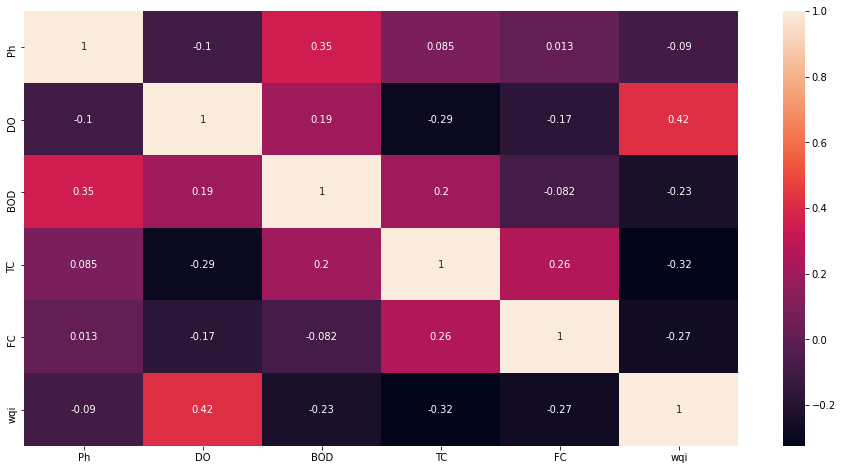

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

**MLR Multiple linear regression**

In [9]:
x = df.drop('wqi',axis=1)
x.head()

,Ph,DO,BOD,TC,FC
0,8.33,6.67,4.30,98435.33,93183.69
1,7.35,7.57,5.15,45222.91,61149.88
2,8.28,7.91,3.32,77784.31,63018.54
3,7.57,7.88,4.98,29773.00,74734.65
4,7.83,6.29,8.22,120213.00,22230.46


In [10]:
y = df['wqi']
y.head()

0    55.14
1    55.14
2    55.14
3    55.14
4    48.48
Name: wqi, dtype: float64

In [11]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [12]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_prediction =  LR.predict(x_test)
y_prediction

array([43.8447811 , 55.33183164, 51.38542377, 53.41155395, 48.30557835])

In [14]:
from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(y_test, y_prediction)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.051


In [15]:
import numpy as np
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is -0.4657477141148778
mean_sqrd_error is== 49.55151281067259
root_mean_squared error of is== 7.039283543846816


In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})
df

,Actual,Predicted
8,45.12,43.844781
16,48.48,55.331832
0,55.14,51.385424
18,55.14,53.411554
11,61.80,48.305578


In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

Mean Absolute Error: 5.42089889355726
Mean Squared Error: 49.55151281067259
Root Mean Squared Error: 7.039283543846816
